In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
FE_h1 = np.loadtxt("FE_h1.txt")
FE_h2 = np.loadtxt("FE_h2.txt")
FE_h3 = np.loadtxt("FE_h3.txt")
FE_h4 = np.loadtxt("FE_h4.txt")

In [127]:
def Plot(data,h,name):
    x = np.linspace(0,1,len(data[0]))
    plt.plot(x.data[0],label="True")
    plt.plot(x,data[1],label="Forward_Eular")
    plt.plot(x,data[2],label="Backward_Eular")
    plt.xlabel("x")
    plt.ylabel("Solution Value")
    plt.title("For h = " + str(h))
    err1 = np.sum(abs(data[0]-data[1]))
    err2 = np.sum(abs(data[0]-data[2]))
    plt.figtext(0.35,0.4,"Error(|True-FE|) = "+str(np.round(np.sum(abs(data[0]-data[1])),3))) 
    plt.figtext(0.35,0.5,"Error(|True-BE|) = "+str(np.round(np.sum(abs(data[0]-data[2])),3))) 
    plt.legend()
    plt.savefig(str(name))
    return err1,err2,1/h

## Problem 1

The error keeps on increasing, hk=z condition is voilated

In [128]:
# To save error for different value of h
Error = np.zeros((4,3))

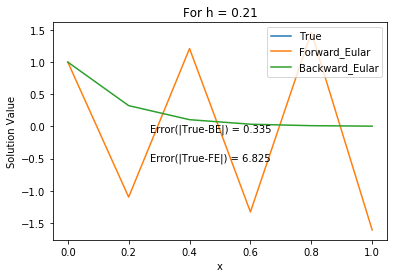

In [129]:
Error[0][0],Error[0][1],Error[0][2]=Plot(FE_h1,0.21,"H_0.21.png")

The value arn't increasing with increase in number of evaluation. HK=Z is not voilated

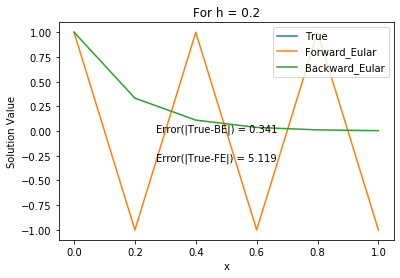

In [130]:
Error[1][0],Error[1][1],Error[1][2] = Plot(FE_h2,0.2,"H_0.2.png")

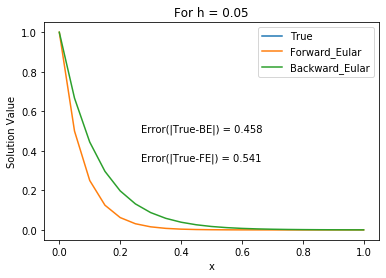

In [131]:
Error[2][0],Error[2][1],Error[2][2] = Plot(FE_h3,0.05,"H_0.05.png")

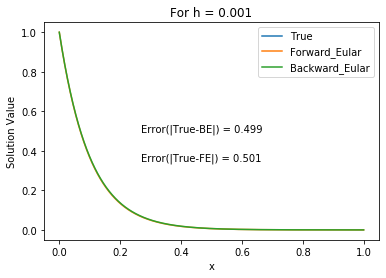

In [132]:
Error[3][0],Error[3][1],Error[3][2] = Plot(FE_h4,0.001,"H_0.001.png")

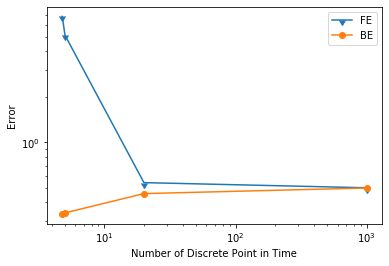

In [135]:
plt.loglog(Error[:,2],Error[:,0],label ="FE",marker=11)
plt.loglog(Error[:,2],Error[:,1],label ="BE",marker='o')
plt.legend()
plt.xlabel("Number of Discrete Point in Time")
plt.ylabel("Error")
plt.savefig("Error Study")

## Problem 2

## FE

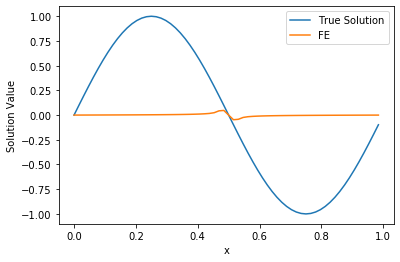

In [55]:
Solution = np.loadtxt("FE_2.txt")
Ns = len(Solution)
x = np.linspace(0,1-1/Ns,Ns)
plt.plot(x,np.sin(2*np.pi*x),label = 'True Solution')
plt.plot(x,Solution,label = 'FE')
plt.xlabel("x")
plt.ylabel("Solution Value")
plt.legend()
plt.savefig("FE_PROBLEM_2.png")

## BE

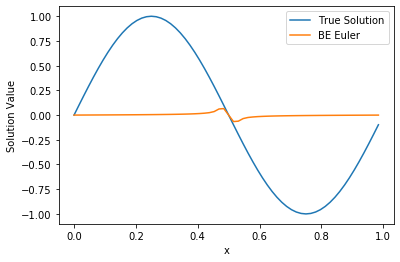

In [56]:
Solution = np.loadtxt("BE_2.txt")
Ns = len(Solution)
x = np.linspace(0,1-1/Ns,Ns)
plt.plot(x,np.sin(2*np.pi*x),label = 'True Solution')
plt.plot(x,Solution,label = 'BE Euler')
plt.xlabel("x")
plt.ylabel("Solution Value")
plt.legend()
plt.savefig("BE_PROBLEM_2.png")

## CNLF

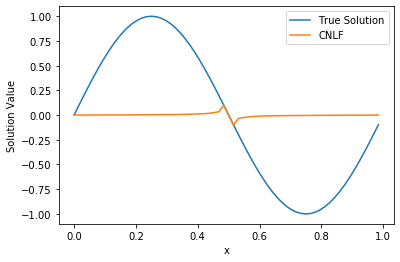

In [57]:
Solution = np.loadtxt("CNLF.txt")
Ns = len(Solution)
x = np.linspace(0,1-1/Ns,Ns)
plt.plot(x,np.sin(2*np.pi*x),label = 'True Solution')
plt.plot(x,Solution,label = 'CNLF')
plt.xlabel("x")
plt.ylabel("Solution Value")
plt.legend()
plt.savefig("CNLF_PROBLEM_2.png")

# Python Routines For FE,BE,CNLF

### FE

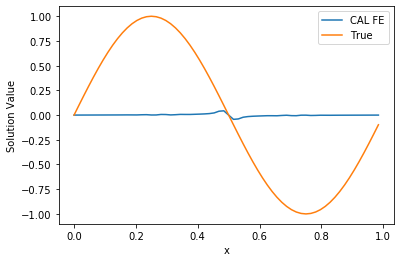

In [60]:
Nt = 70
Ns = 64
dx = 1/Ns
dt = 1/Nt
x  = np.linspace(0,1-dx,Ns)
Nu = 0.002

u0    = np.sin(2*np.pi*x)
uTrue = u0.copy()
Un    = u0.copy()

for i in range(Nt):
    for j in range(Ns):
        if j == 0:
            ul = u0[-1]
            ur = u0[j+1]
            
        elif j == Ns-1:
            ul = u0[j-1]
            ur = u0[0]
            
        else:
            ul = u0[j-1]
            ur = u0[j+1]
            
        Un[j] = u0[j] + dt*(-np.sin(2*np.pi*x[j])*(ur-ul)/(2*dx) + Nu*(ur - 2*u0[j] + ul)/(dx*dx))
    
    #Un[-1] = Un[0]
    u0 = Un.copy()
plt.plot(x,u0,label = 'CAL FE')
plt.plot(x,uTrue,label='True')
plt.xlabel("x")
plt.ylabel("Solution Value")
plt.legend()
plt.savefig("FE_Nt_70.png")

### BE

In [64]:
def BE(dt,Nt,Ns):
    dx = 1/Ns
    #print("\ndx\n",dx,"\ndt\n",dt)
    x  = np.linspace(0,1-dx,Ns)
    Nu = 0.002

    u0    = np.sin(2*np.pi*x).reshape(-1,1)
    uTrue = u0.copy()
    A     = np.zeros((Ns,Ns)) 
    b     = np.zeros((Ns,1)) 
    
    #print("\nu0\n",u0)
    t = 0
    for i in range(Nt):
        for j in range(Ns):
            if j==0:
                A[j][j+1] = -dt*(-0.5*np.sin(2*np.pi*x[j])/dx + Nu/np.power(dx,2))/(1+2*Nu*dt/np.power(dx,2))
                A[j][j]   =  1
                A[j][-1]  = -dt*(0.5*np.sin(2*np.pi*x[j])/dx + Nu/np.power(dx,2))/(1+2*Nu*dt/np.power(dx,2))

            elif j==Ns-1:
                A[j][0]   = -dt*(-0.5*np.sin(2*np.pi*x[j])/dx + Nu/np.power(dx,2))/(1+2*Nu*dt/np.power(dx,2))
                A[j][j]   =  1
                A[j][j-1] = -dt*(0.5*np.sin(2*np.pi*x[j])/dx + Nu/np.power(dx,2))/(1+2*Nu*dt/np.power(dx,2))
            else:
                A[j][j+1] = -dt*(-0.5*np.sin(2*np.pi*x[j])/dx + Nu/np.power(dx,2))/(1+2*Nu*dt/np.power(dx,2))
                A[j][j]   =  1
                A[j][j-1] = -dt*(0.5*np.sin(2*np.pi*x[j])/dx + Nu/np.power(dx,2))/(1+2*Nu*dt/np.power(dx,2))

            b[j][0] = u0[j][0]/(1+2*Nu*dt/np.power(dx,2))

        u0 = np.linalg.solve(A,b)
        t = t + dt
        #plt.plot(x,u0,label = 'CAL_be')
        #plt.plot(x,uTrue,label='True_be')
        #plt.legend()
        #plt.show()
        #plt


    #print(" A = \n",A,"\n b = \n", b,"\n u= \n",u0,"\n Utrue : \n",uTrue)
    
    #plt.plot(x,u0,label = 'CAL_BE')
    #plt.plot(x,uTrue,label='True_BE')
    #plt.xlabel("x")
    #plt.ylabel("Solution Value")
    #plt.legend()
    #plt.savefig("BE_Nt_70.png")
    return u0

Nt = 70
dt = 1/Nt
Ns = 64
u = BE(dt,Nt,Ns)

## CNLF

$$A_{ij} = -\frac{\frac{dt}{2}\Big(\frac{\nu}{dx^2}\Big)}{1  + \frac{dt\nu}{dx^2}}$$<br><br>
$$
b_i = \frac{\Big(u_i^{n-1} -2*dt\sin(2{\pi}x_i)\frac{ u_{i+1}^{n} - u_{i-1}^{n}}{2dx} + \frac{dt\nu}{2}\Big( \frac{u_{i+1}^{n-1} - 2u_{i}^{n-1} + u_{i-1}^{n-1}}{dx^2}  \Big)\Big)} {1  + \frac{dt\nu}{dx^2}}
$$

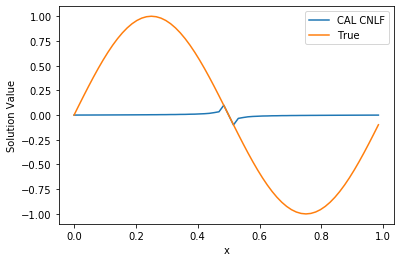

In [70]:
Nt = 70
Ns = 64
dx = 1/Ns
dt = 1/Nt
x  = np.linspace(0,1-dx,Ns)
Nu = 0.002

def f(val):
    return np.sin(2*np.pi*val)

uNminusOne    = np.sin(2*np.pi*x) #n-1
uN            = BE(dt,1,Ns)     #n
uNplusOne     = uN.copy() #n+1

uTrue  = uNminusOne.copy()

A     = np.zeros((Ns,Ns)) 
b     = np.zeros((Ns))
FractionTerm = 1 + Nu*dt/pow(dx,2);

t = 0
for i in range(Nt):
    for j in range(Ns):  
        if j==0:
            A[j][j+1] = (-dt*0.5*Nu/np.power(dx,2))/FractionTerm
            A[j][j]   =  1
            A[j][-1]  = (-dt*0.5*Nu/np.power(dx,2))/FractionTerm   
            b[j]      = ( uNminusOne[j] - dt*f(x[j])*(uN[j+1] - uN[-1])/dx + 0.5*Nu*dt*(uNminusOne[j+1] - 2*uNminusOne[j] + uNminusOne[-1])/(dx*dx) ) / FractionTerm 
             
        elif j==Ns-1:
            A[j][0]   = (-dt*0.5*Nu/np.power(dx,2))/FractionTerm
            A[j][j]   =  1
            A[j][j-1] = (-dt*0.5*Nu/np.power(dx,2))/FractionTerm
            b[j]      = ( uNminusOne[j] - dt*f(x[j])*(uN[0] - uN[j-1])/dx + 0.5*Nu*dt*(uNminusOne[0] - 2*uNminusOne[j] + uNminusOne[j-1])/(dx*dx) ) / FractionTerm
            
        else:
            A[j][j+1] = (-dt*0.5*Nu/np.power(dx,2))/FractionTerm
            A[j][j]   =  1
            A[j][j-1] = (-dt*0.5*Nu/np.power(dx,2))/FractionTerm
            b[j]      = ( uNminusOne[j] - dt*f(x[j])*(uN[j+1] - uN[j-1])/dx + 0.5*Nu*dt*(uNminusOne[j+1] - 2*uNminusOne[j] + uNminusOne[j-1])/(dx*dx) )/ FractionTerm
    
    t = t + dt 
    #print(A,b)
    uNplusOne = np.linalg.solve(A,b.T)
    uNminusOne = uN.copy()
    uN   = uNplusOne.copy()
    
    #plt.plot(x,uNplusOne,label = 'CAL')
    #plt.plot(x,uTrue,label='True')
    #plt.legend()
    #plt.pause(0.0001)


plt.plot(x,uNplusOne,label = 'CAL CNLF')
plt.plot(x,uTrue,label='True')
plt.xlabel("x")
plt.ylabel("Solution Value")
plt.legend()
#plt.savefig("cnlf_Nt_70.png")
